# Histogram of time distribution between different events

In [2]:
%reload_ext autoreload
%autoreload 2

import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from collections import defaultdict

In [36]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
from src.utils import get_all_channels_messages, get_all_channels_replies

In [39]:
def plot_histogram(data, title, xlabel, ylabel, bins=10):
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def calculate_time_differences(timestamps):
    time_diffs = []

    for i in range(1, len(timestamps)):
        ts1 = float(timestamps[i - 1][1])
        ts2 = float(timestamps[i][1])
        time_diff = ts2 - ts1

        #List of time differences in hours.
        time_diffs.append(time_diff/3600)

    return time_diffs

def calculate_replies_time_differences(replies):
    time_diffs = []

    for reply_list in replies:
        for i in range(1, len(reply_list)):
            ts1 = float(reply_list[i - 1]['ts'])
            ts2 = float(reply_list[i]['ts'])
            time_diff = ts2 - ts1
            time_diffs.append(time_diff/3600)

    return time_diffs

In [34]:
slack_data_path = os.path.abspath('../anonymized')
all_channels = SlackDataLoader(slack_data_path).get_channels()

# Histogram of time distribution between consecutive messages from all channel

In [35]:
messages_with_timestamp = get_all_channels_messages(all_channels)
messages_with_timestamp.sort(key=lambda x: float(x[1]))

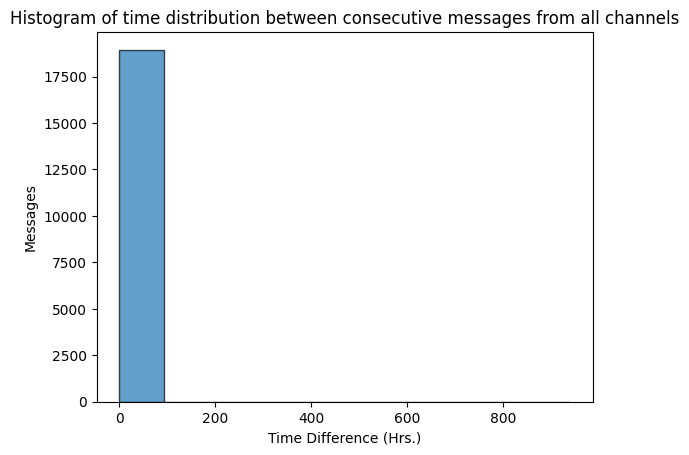

In [41]:
time_distribution_of_consecutive_msgs = calculate_time_differences(messages_with_timestamp)

plot_histogram(time_distribution_of_consecutive_msgs, 'Histogram of time distribution between consecutive messages from all channels',
               'Time Difference (Hrs.)', 'Messages')

# Histogram of time distribution between consecutive replies from all channels

In [37]:
replies_with_timestampes = get_all_channels_replies(all_channels)

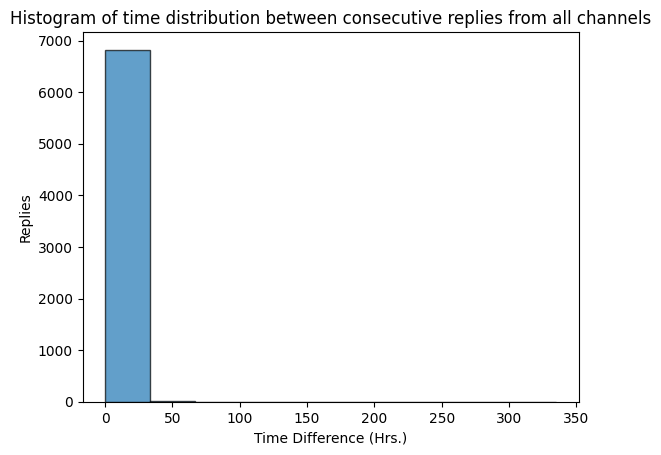

In [40]:
time_distribution_of_consecutive_replies = calculate_replies_time_differences(replies_with_timestampes)
plot_histogram(time_distribution_of_consecutive_replies, 'Histogram of time distribution between consecutive replies from all channels', 'Time Difference (Hrs.)', 'Replies')